# CG20-Aula5-Filtragem com FFT


<hl> https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html </hl>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


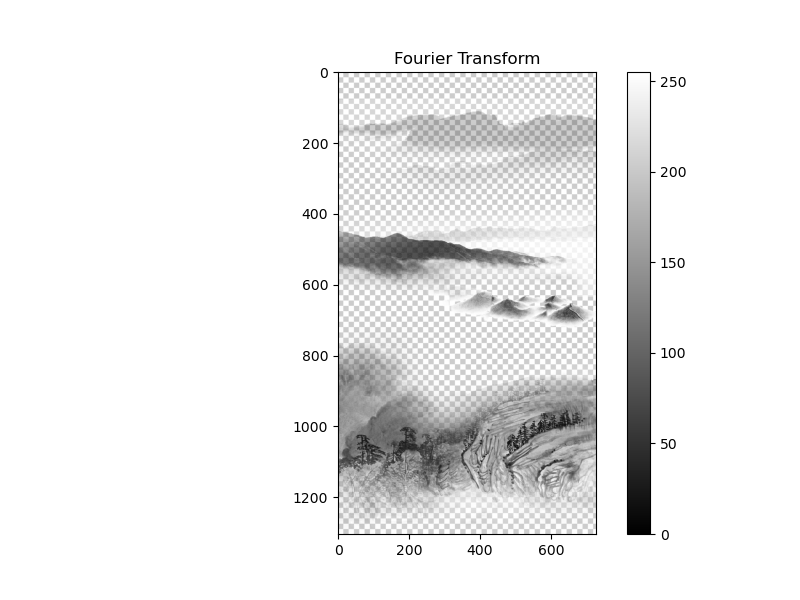

In [15]:
img = plt.imread('montan_pixelada.jpg')

def show_img(image):
    plt.figure(figsize=(8,6))
    plt.imshow(image,plt.cm.gray)
    plt.colorbar()
    
show_img(img)

In [16]:
from scipy import fftpack
im_fft = fftpack.fft2(img)

In [17]:
print(img.shape, img.dtype)
print(im_fft.shape, im_fft.dtype)

(1304, 728) uint8
(1304, 728) complex128


<IPython.core.display.Javascript object>


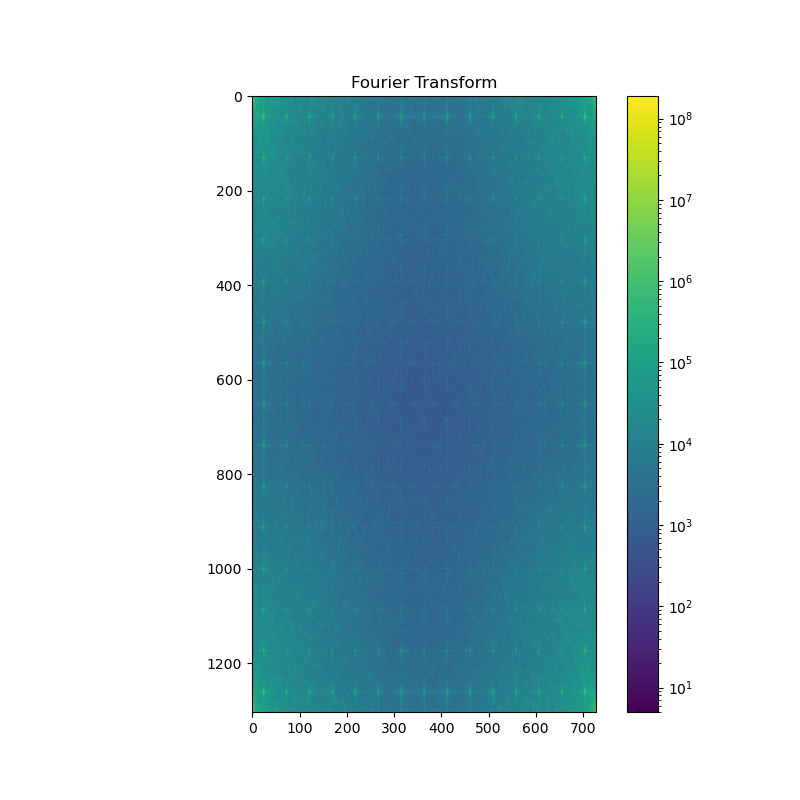

In [18]:
from matplotlib.colors import LogNorm
#show the result
def show_spectrum(im_fft,title):
    plt.title(title)
    plt.figure(figsize=(8,8))
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
show_spectrum(im_fft,'Fourier Transform')

In [19]:
im_fft_shift = fftpack.fftshift(im_fft)

<IPython.core.display.Javascript object>


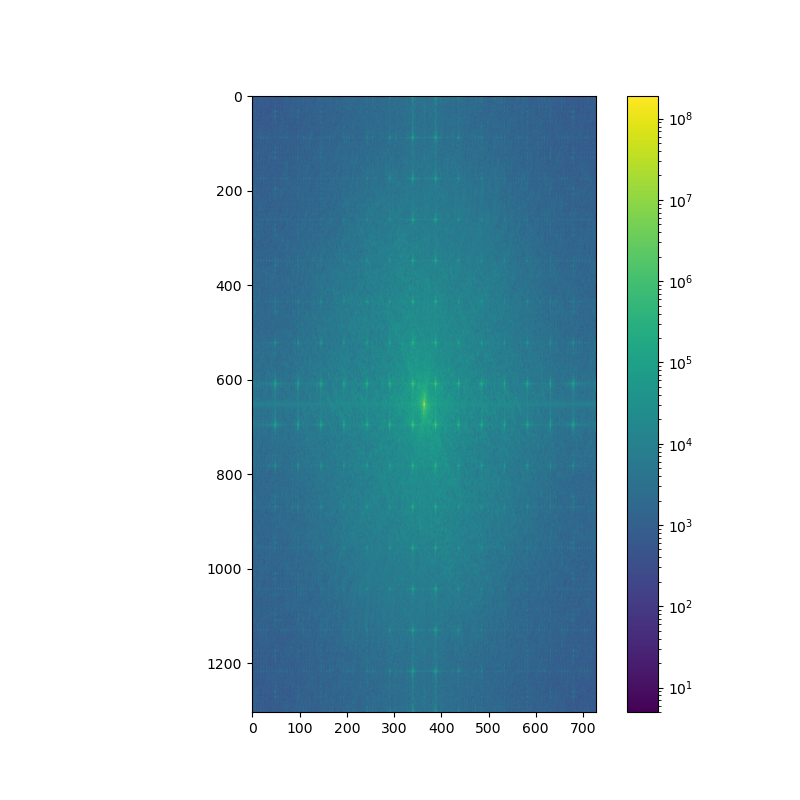

In [20]:
show_spectrum(im_fft_shift,'Fourier Transform')

In [21]:
h, w =img.shape[:2]
print(f'(h,w)={h},{w}')

(h,w)=1304,728


<IPython.core.display.Javascript object>


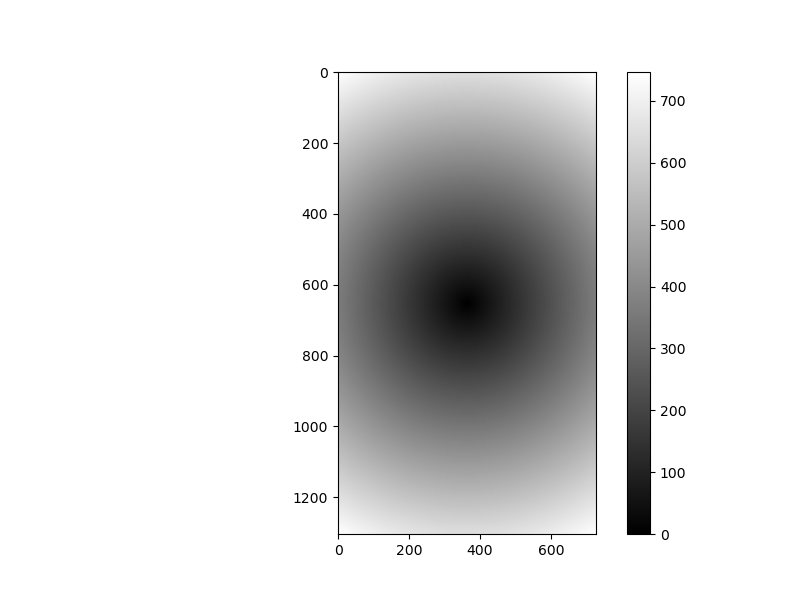

In [28]:
Y,X = np.ogrid[0:h,0:w]
#mask = (X-w/2)**2+(Y-h/2)**2 > 200**2
mask = np.sqrt((X-w/2)**2+(Y-h/2)**2)
show_img(mask)

<IPython.core.display.Javascript object>


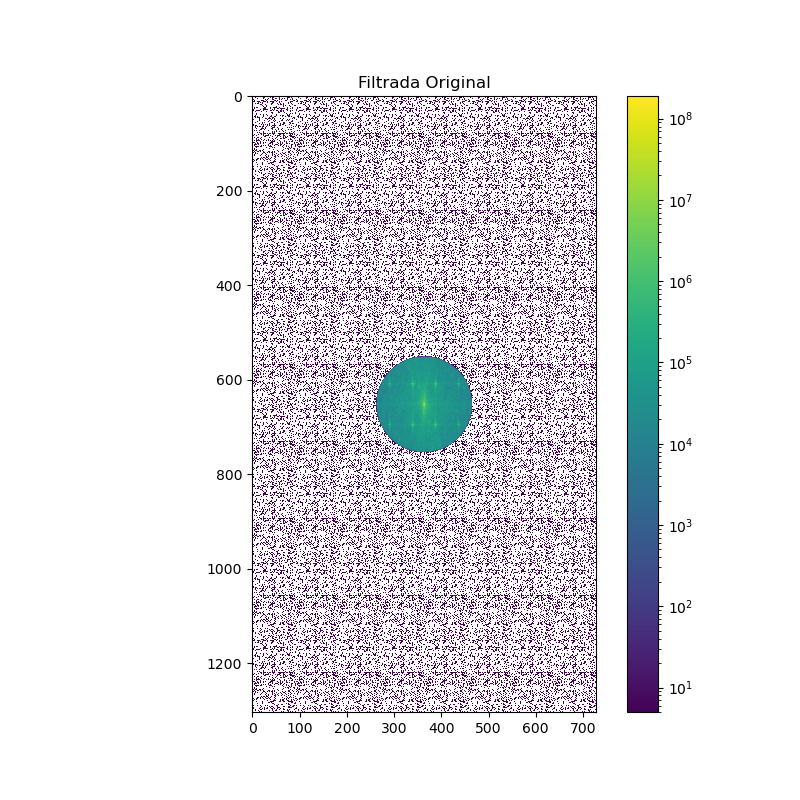

In [23]:
#im_fft_shift[mask]=0
# Frequencias menores 10,20,30 e altas frequencias 150,200,250..
im_fft_shift[mask>100]=0
show_spectrum(im_fft_shift,"Frequencia Filtrada")

<IPython.core.display.Javascript object>


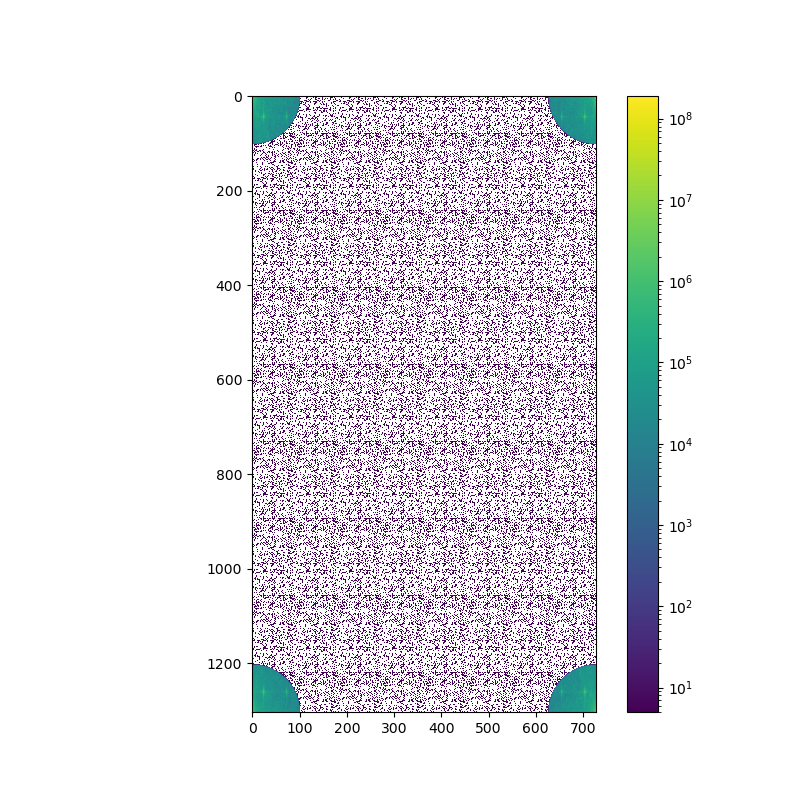

In [24]:
im_fft_2 = fftpack.ifftshift(im_fft_shift)
show_spectrum(im_fft_2,"Filtrada Original")

shape=(1304, 728), typefloat64


<IPython.core.display.Javascript object>


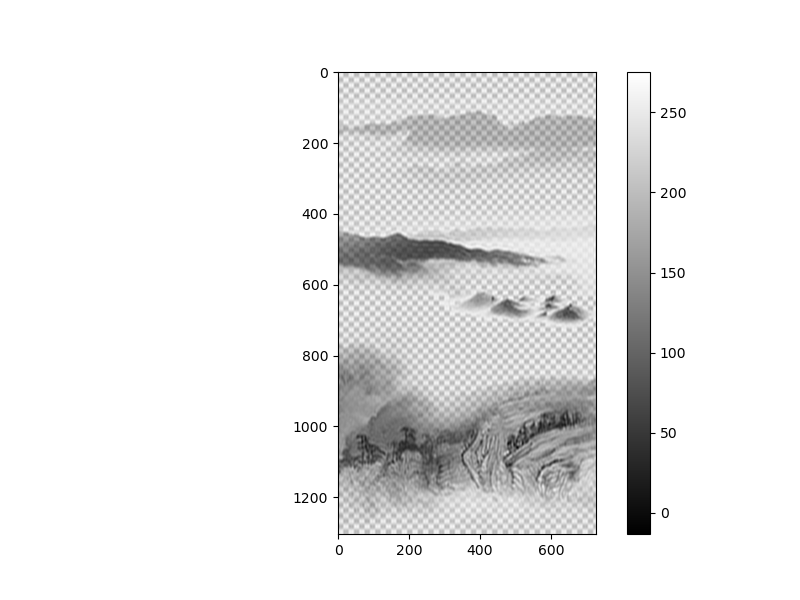

In [25]:
im_2 = fftpack.ifft2(im_fft_2).real
print(f'shape={im_2.shape}, type{im_2.dtype}')
show_img(im_2)

<IPython.core.display.Javascript object>


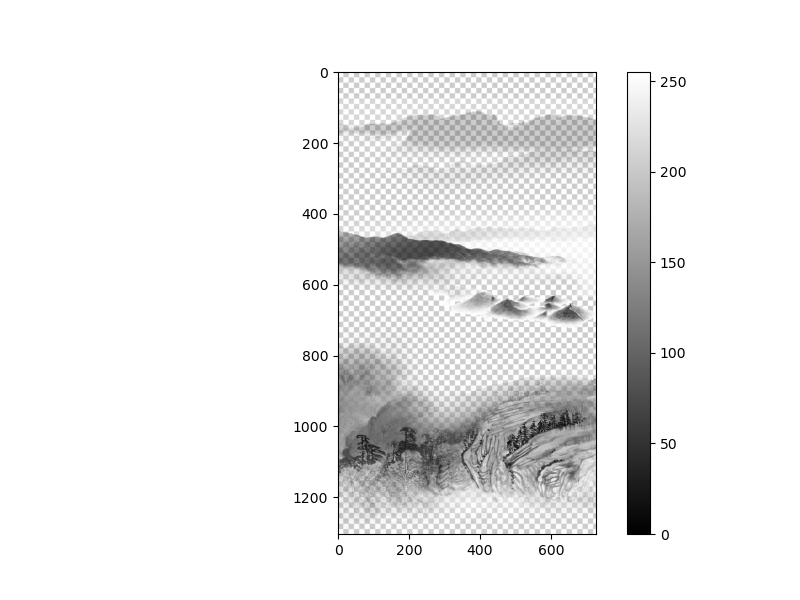

In [26]:
show_img(img)